# Детектирование точек тела человека

## YOLO11s-pose

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

Продемонстрируем работу YOLO11s-pose на изображении


0: 448x640 1 person, 284.0ms
Speed: 8.0ms preprocess, 284.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


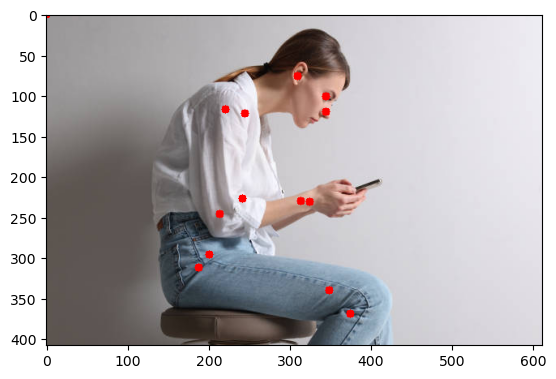

In [3]:
model = YOLO('../models/yolo11s-pose.pt')
image = cv2.imread('../images/test-image.jpg')
results = model.predict(image, iou=0.4, conf=0.5)

for i in range(len(results[0].keypoints.xy)):
    keypoints = results[0].keypoints.xy[i]
    for j, point in enumerate(keypoints):
        x, y = point
        if x >= 0 and y >= 0:
            cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

YOLO11s-pose позволяет находить 17 основных точек тела человека, однако для нашей задачи достаточно находить только точки, находящиеся на линии позвоночника

Отобразим только точки в районе бёдер, плечей и ушей


0: 448x640 1 person, 226.0ms
Speed: 5.0ms preprocess, 226.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


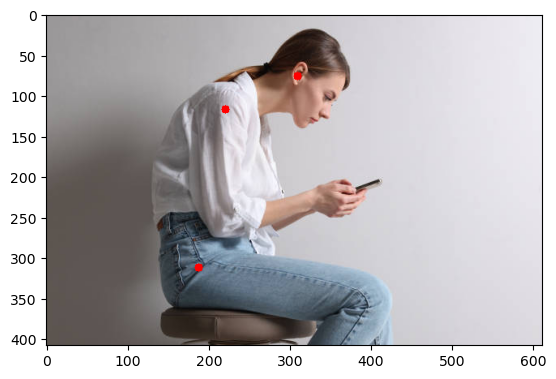

In [4]:
model = YOLO('../models/yolo11s-pose.pt')
image = cv2.imread('../images/test-image.jpg')
results = model.predict(image, iou=0.4, conf=0.5)

for i in range(len(results[0].keypoints.xy)):
    keypoints = results[0].keypoints.xy[i]
    for j, point in enumerate(keypoints):
        if j in [4, 6, 12]:
            x, y = point
            if x >= 0 and y >= 0:
                cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

## Fine tuning YOLO11s-pose

Теперь продемонстрируем работу сети полученной в результате fine tuning сети YOLO11s-pose на собранном датасете


0: 448x640 1 person, 252.0ms
Speed: 5.0ms preprocess, 252.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


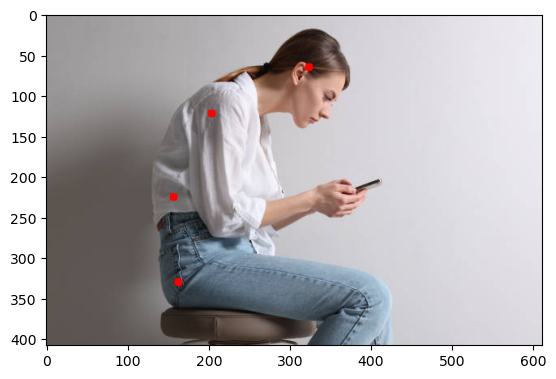

In [5]:
model = YOLO('../models/best.pt')
image = cv2.imread('../images/test-image.jpg')
results = model.predict(image, iou=0.4, conf=0.5)

for i in range(len(results[0].keypoints.xy)):
    keypoints = results[0].keypoints.xy[i]
    for j, point in enumerate(keypoints):
        x, y = point
        if x >= 0 and y >= 0:
            cv2.circle(image, (int(x), int(y)), 5, (0, 0, 255), -1)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)

Можем отметить, что точки в районе бёдер, плечей и ушей наша модель детектит со схожей точностью. Однако модель детектит еще одну точку в районе поясницы